In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from PIL import Image

from methods import node_wise_polynomial_interpolation, bilinear_interpolation

warnings.filterwarnings("ignore")

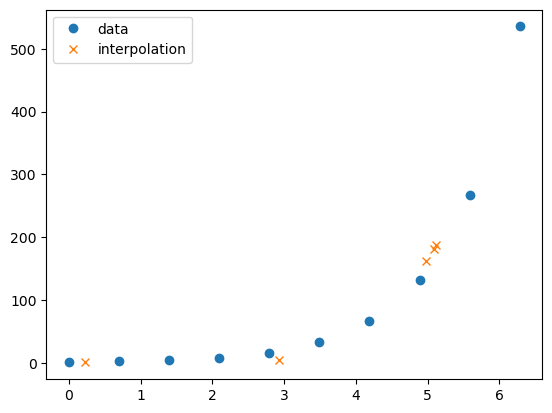

In [2]:
# generate data
x = np.linspace(0, 2*np.pi, 10)
y = np.exp(x)

# interpolate
x_new = np.random.rand(5)*2*np.pi
f = node_wise_polynomial_interpolation(x, y, x_new, degree=3)

# plot
plt.plot(x, y, 'o', label='data')
plt.plot(x_new, f, 'x', label='interpolation')
plt.legend()
plt.show()

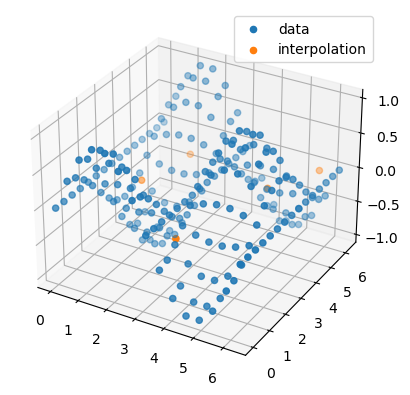

In [3]:
# generate data
x = np.linspace(0, 2 * np.pi, 15)
x = np.array([[i, j] for i in x for j in x])
y = np.sin(x[:, 0]) * np.cos(x[:, 1])

# interpolate
x_new = np.random.rand(5, 2) * 2 * np.pi
f = node_wise_polynomial_interpolation(x, y, x_new)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, label='data')
ax.scatter(x_new[:, 0], x_new[:, 1], f, label='interpolation')
plt.legend()
plt.show()

Original image shape: (316, 316, 4)
Interpolated image shape: (1264, 1264, 4)


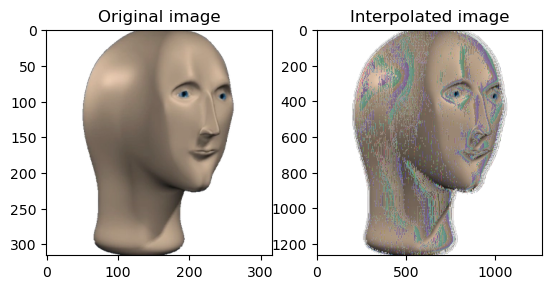

In [22]:
image = Image.open('examples/succ.png')
image_arr = np.asarray(image)

# interpolate
ratio = 4
x_new = int(ratio*image_arr.shape[0])
y_new = int(ratio*image_arr.shape[1])
interpolated_image_arr = bilinear_interpolation(image_arr, x_new, y_new)
print(f'Original image shape: {image_arr.shape}')
print(f'Interpolated image shape: {interpolated_image_arr.shape}')

# show image before and after
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_arr, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(interpolated_image_arr, cmap='gray')
ax[1].set_title('Interpolated image')
plt.show()